In [6]:
import sys
import os

project_path = r"C:\Users\jjmcc\OneDrive\Documents\Thesis Interim\ITGC-interim"
sys.path.append(project_path)

print("Project path added.")

Project path added.


In [7]:
import pandas
print(pandas.__file__)


d:\Users\jjmcc\anaconda3\envs\ITGC-interim\lib\site-packages\pandas\__init__.py


In [8]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import umap
import os


d:\Users\jjmcc\anaconda3\envs\ITGC-interim\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
embed_path = r"E:/ProcessedMRI/mri_embeds.pbz2"

embeds_dict = joblib.load(embed_path)
print("Loaded embeddings:", len(embeds_dict), "samples")


Loaded embeddings: 40 samples


In [10]:
# embeds_dict: { 'A1K2P5_slice0': vector, ... }

keys = list(embeds_dict.keys())
X = np.array([embeds_dict[k] for k in keys])

print("Embedding matrix:", X.shape)


Embedding matrix: (40, 512)


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)
print("UMAP reduced shape:", X_umap.shape)


d:\Users\jjmcc\anaconda3\envs\ITGC-interim\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP reduced shape: (40, 2)


d:\Users\jjmcc\anaconda3\envs\ITGC-interim\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\jjmcc\anaconda3\envs\ITGC-interim\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\jjmcc\anaconda3\envs\ITGC-interim\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\jjmcc\anaconda3\envs\ITGC-interim\lib\site-packages\sklearn\cluster\_kmea

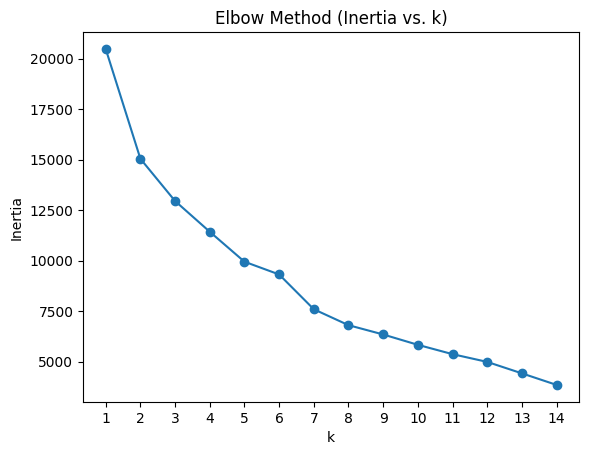

In [57]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

K_values = range(1, 15)
inertias = []

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(K_values, inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method (Inertia vs. k)")
plt.xticks(K_values)
plt.show()


In [66]:
n_clusters = 4   # Elbow appears at k=4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


d:\Users\jjmcc\anaconda3\envs\ITGC-interim\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


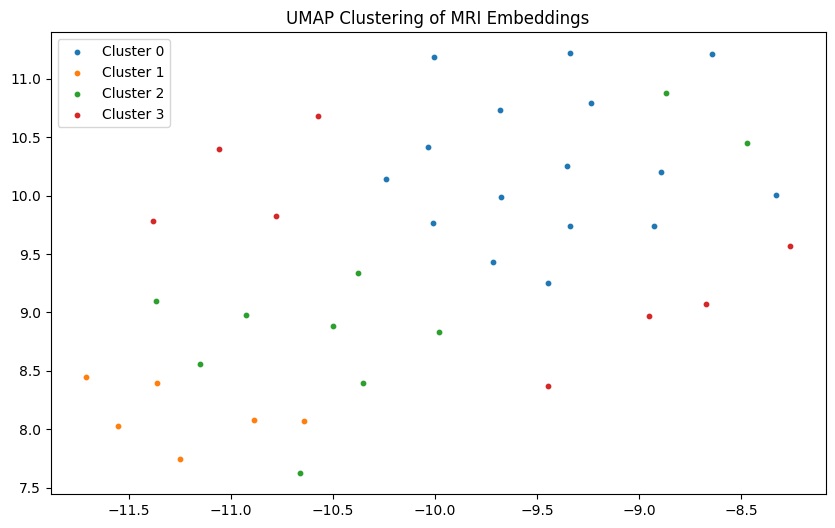

In [67]:
plt.figure(figsize=(10, 6))
for c in range(n_clusters):
    idx = clusters == c
    plt.scatter(X_umap[idx, 0], X_umap[idx, 1], s=10, label=f"Cluster {c}")

plt.title("UMAP Clustering of MRI Embeddings")
plt.legend()
plt.show()


In [16]:
cluster_contents = {c: [] for c in range(n_clusters)}

for key, cluster_id in zip(keys, clusters):
    cluster_contents[cluster_id].append(key)
    
print(cluster_contents)


{0: ['slice_04_ES.png', 'slice_05_ED.png', 'slice_06_ED.png', 'slice_07_ED.png', 'slice_07_ES.png', 'slice_08_ED.png', 'slice_08_ES.png', 'slice_09_ED.png', 'slice_09_ES.png', 'slice_10_ED.png', 'slice_10_ES.png', 'slice_11_ED.png', 'slice_17_ES.png'], 1: ['slice_00_ED.png', 'slice_00_ES.png', 'slice_01_ES.png', 'slice_02_ES.png', 'slice_12_ED.png', 'slice_12_ES.png', 'slice_13_ED.png', 'slice_13_ES.png', 'slice_14_ED.png', 'slice_14_ES.png', 'slice_15_ED.png', 'slice_15_ES.png'], 2: ['slice_01_ED.png', 'slice_02_ED.png', 'slice_03_ES.png', 'slice_04_ED.png', 'slice_16_ED.png', 'slice_16_ES.png', 'slice_19_ES.png'], 3: ['slice_03_ED.png', 'slice_05_ES.png', 'slice_06_ES.png', 'slice_11_ES.png', 'slice_17_ED.png', 'slice_18_ED.png', 'slice_18_ES.png', 'slice_19_ED.png']}


In [17]:
import os

root = r"E:\ProcessedMRI"   

# Find all PNG files
png_files = []
for path, folders, files in os.walk(root):
    for f in files:
        if f.endswith(".png"):
            png_files.append(os.path.join(path, f))

print("Found PNG files:", len(png_files))
print("\nExample:", png_files[:5])


Found PNG files: 3242

Example: ['E:\\ProcessedMRI\\G8K0M3\\slice_00_ED.png', 'E:\\ProcessedMRI\\G8K0M3\\slice_00_ES.png', 'E:\\ProcessedMRI\\G8K0M3\\slice_01_ED.png', 'E:\\ProcessedMRI\\G8K0M3\\slice_01_ES.png', 'E:\\ProcessedMRI\\G8K0M3\\slice_02_ED.png']


Example key: slice_04_ES.png
Resolved path: E:\ProcessedMRI\G8K0M3\slice_04_ES.png


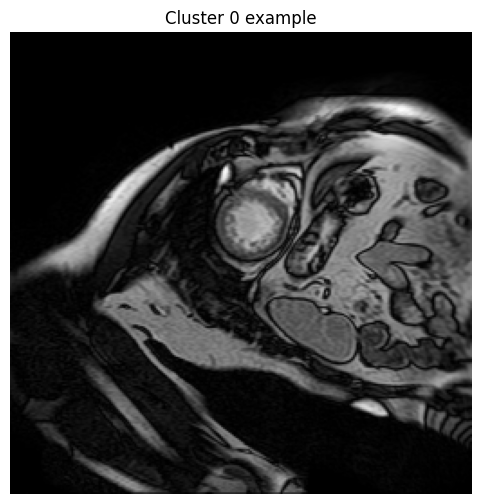

In [18]:
import cv2
import matplotlib.pyplot as plt
import os

# Point this to ProcessedMRI since PNGs live there
PNG_ROOT = r"E:\ProcessedMRI"

def find_png_path(file_name):
    """
    Search for a PNG filename inside ProcessedMRI and all subfolders.
    """
    for path, dirs, files in os.walk(PNG_ROOT):
        if file_name in files:
            return os.path.join(path, file_name)
    return None

def show_example(cluster_id):
    """
    Visualize the first PNG image belonging to a given cluster.
    """
    cluster_keys = [k for k, c in zip(keys, clusters) if c == cluster_id]

    if not cluster_keys:
        print(f"No images found for cluster {cluster_id}")
        return

    key = cluster_keys[0]
    print("Example key:", key)

    img_path = find_png_path(key)
    print("Resolved path:", img_path)

    if img_path is None:
        print("❌ PNG not found in ProcessedMRI!")
        return

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title(f"Cluster {cluster_id} example")
    plt.axis("off")
    plt.show()
# Show example for cluster 0
show_example(0)



In [19]:
import os

# The folder where ALL PNG slices live
data_root = r"E:/ProcessedMRI"

# Create a mapping from embedding key → absolute file path
key_to_path = {}

for root, dirs, files in os.walk(data_root):
    for f in files:
        if f.endswith(".png"):
            key_to_path[f] = os.path.join(root, f)

print("Mapped", len(key_to_path), "PNG files")


Mapped 40 PNG files



Showing example for cluster 0
Loading: E:/ProcessedMRI\L8M2U8\slice_04_ES.png


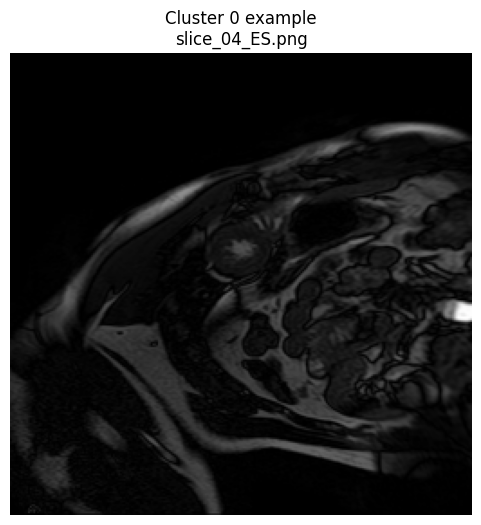


Showing example for cluster 1
Loading: E:/ProcessedMRI\L8M2U8\slice_00_ED.png


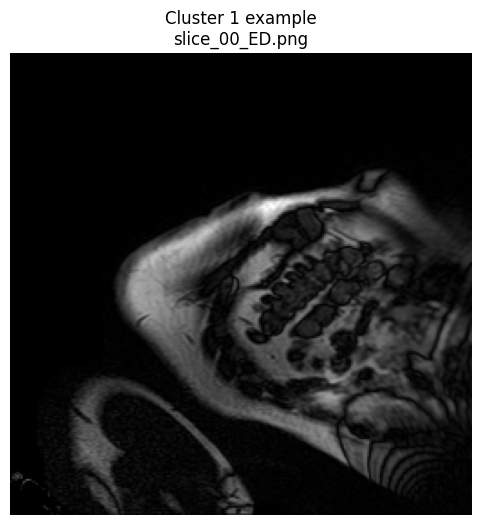


Showing example for cluster 2
Loading: E:/ProcessedMRI\L8M2U8\slice_01_ED.png


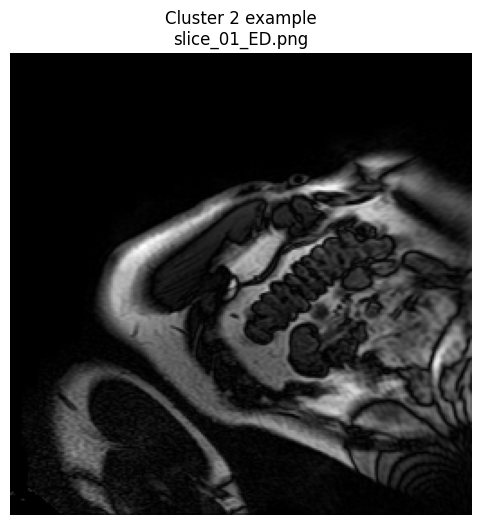


Showing example for cluster 3
Loading: E:/ProcessedMRI\L8M2U8\slice_03_ED.png


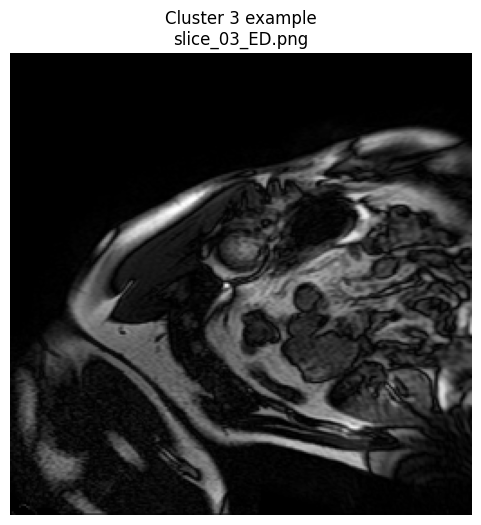

In [20]:
import cv2
import matplotlib.pyplot as plt

def show_example(c):
    print(f"\nShowing example for cluster {c}")

    # pick first key from this cluster
    key = cluster_contents[c][0]
    path = key_to_path[key]

    print("Loading:", path)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title(f"Cluster {c} example\n{key}")
    plt.axis("off")
    plt.show()

for c in range(n_clusters):
    show_example(c)


In [68]:
from sklearn.metrics import silhouette_score

def evaluate_clustering(X_features, labels):
    print("=== Clustering Quality Metrics ===")
    
    sil = silhouette_score(X_features, labels)
    print(f"Silhouette Score:           {sil:.4f}")


    return sil

In [69]:
print("IMAGE-ONLY CLUSTERING METRICS:")
evaluate_clustering(X_scaled, clusters)


IMAGE-ONLY CLUSTERING METRICS:
=== Clustering Quality Metrics ===
Silhouette Score:           0.1706


0.17063626646995544

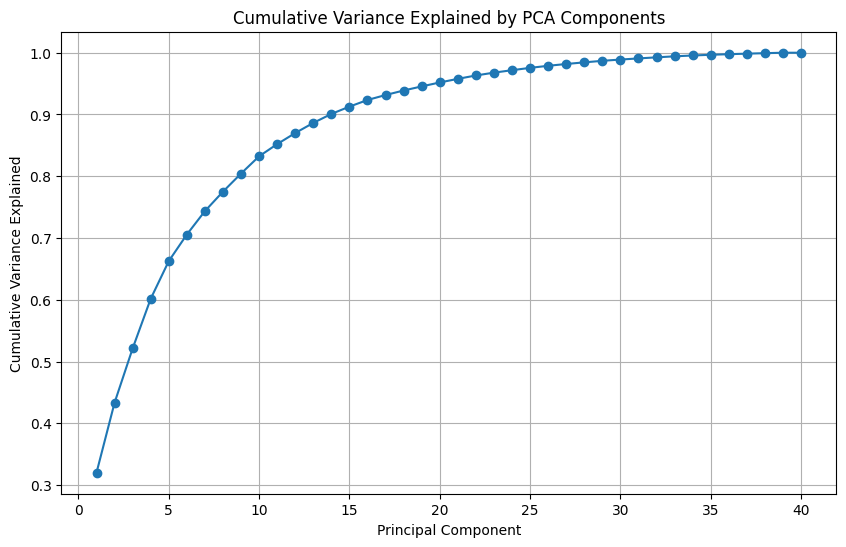

Variance explained by first 5 components:
PC 1: 0.3200
PC 2: 0.4333
PC 3: 0.5212
PC 4: 0.6016
PC 5: 0.6626


In [70]:
# ===== PCA VARIANCE EXPLAINED =====
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca_full = PCA()
pca_full.fit(X_scaled)

explained = pca_full.explained_variance_ratio_
cumulative = np.cumsum(explained)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative) + 1), cumulative, marker='o')
plt.title("Cumulative Variance Explained by PCA Components")
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()

print("Variance explained by first 5 components:")
for i in range(5):
    print(f"PC {i+1}: {cumulative[i]:.4f}")

In [71]:
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import numpy as np


def evaluate_clustering(X, labels, name):
    # If DBSCAN finds 0 or 1 clusters, silhouette cannot be computed
    unique_labels = set(labels)
    if len(unique_labels) <= 1:
        return {"Method": name, "Silhouette": np.nan}

    sil = silhouette_score(X, labels)

    return {"Method": name, "Silhouette": sil}


In [72]:
results = []

# ----- KMEANS -----
kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
results.append(evaluate_clustering(X_scaled, labels_kmeans, "KMeans"))

# ----- AGGLOMERATIVE -----
agg = AgglomerativeClustering(n_clusters=4)
labels_agg = agg.fit_predict(X_scaled)
results.append(evaluate_clustering(X_scaled, labels_agg, "Agglomerative"))

# ----- SPECTRAL -----
spec = SpectralClustering(n_clusters=4, assign_labels="kmeans", random_state=42)
labels_spec = spec.fit_predict(X_scaled)
results.append(evaluate_clustering(X_scaled, labels_spec, "Spectral"))

# ----- DBSCAN -----
db = DBSCAN(eps=0.8, min_samples=3)  # tweak if needed
labels_db = db.fit_predict(X_scaled)
results.append(evaluate_clustering(X_scaled, labels_db, "DBSCAN"))


d:\Users\jjmcc\anaconda3\envs\ITGC-interim\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\jjmcc\anaconda3\envs\ITGC-interim\lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
d:\Users\jjmcc\anaconda3\envs\ITGC-interim\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\jjmcc\anaconda3\envs\ITGC-interim\lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibl

In [73]:
df_results = pd.DataFrame(results)
print(df_results)


          Method  Silhouette
0         KMeans    0.170636
1  Agglomerative    0.196124
2       Spectral   -0.028529
3         DBSCAN         NaN


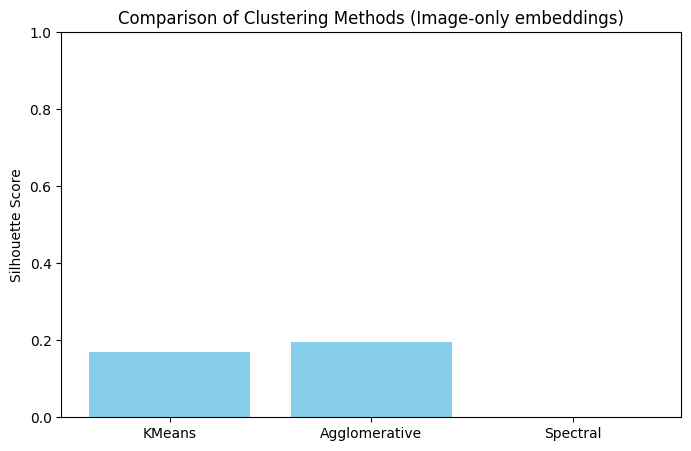

In [74]:
plt.figure(figsize=(8,5))
plt.bar(df_results["Method"], df_results["Silhouette"], color="skyblue")
plt.ylabel("Silhouette Score")
plt.title("Comparison of Clustering Methods (Image-only embeddings)")
plt.ylim(0, 1)
plt.show()
